# Το Πρόβλημα του Περιοδεύοντος Πωλητή (Travelling Salesman Problem, TSP)  με χρήση γενετικών αλγορίθμων

Είναι ένα κλασσικό συνδιαστικό πρόβλημα βελτιστοποίησης. 
Ένας πωλητής πρέπει να επισκεφτεί n πελάτες σε διαφορετικές πόλεις. 
Το ζητούμενο είναι να βρεθεί η σύντομη η/και χαμηλότερη κόστους πορεία την οποία περνά μία μόνο φορά απο κάθε πόλη και επιστρέφει στην πόλη στην οποία ξεκίνησε ο Πωλητής.

Οι Γενετικοί αλγόριθμοι ειναι μια μέθοδος αναζήτησης βέλτιστων λύσεων σε συστήματα που μπορούν να περιγραφούν ως μαθηματικό πρόβλημα.
Ο τρόπος λειτουργίας τους είναι εμπνευσμένος απο την βιολογία. Χρησιμοποιεί την ιδέα της εξέλιξης των ειδών μέσω γενετικής μετάλλαξης, φυσικής επιλογής και διασταύρωσης.

## Περίληψη Εργασίας
Σκοπός είναι να μεγιστοποιήσουμε τη συνάρτηση καταλληλότητας και να βρούμε την καλύτερη λύση.
Οπότε παριστάνουμε την κάθε πόλη με ένα κόμβο και τοποθετούμε μία ακμή ανάμεσα σε δύο πόλεις εάν συνδέονται άμεσα. Σχηματίζεται ο πληθυσμός τυχαία, αξιολογείται η κάθε λύση ξεχωριστά και περνάμε στην επόμενη γενία αφού εφαρμοστούν οι γενετικοί τελεστές. Έτσι κάποιες λύσεις πάνε στην επόμενη γενία αυτούσιες με τη διαδικασία της επιλογής (selection), κάποιες θα υποστούν μετάλλαξη (mutation) και κάποιες άλλες θα διασταυρωθούν (crossover) μεταξύ τους δημιουργώντας απογόνους.


## Δομή ενός ΓΑ

1. Αρχικοποίση - Δημιουργία αρχικού πληθυσμόυ(Initialization)
2. Αποκωδικοποίηση(Decoding)
3. Υπολογισμός ικανότητας η αξιολόγησης(Fitness calculation or evaluation)
4. Αναπαραγωγή(Reproduction)
    I. Επιλογή(Selection)
    II. Διασταύρωση(Crossover)
    III. Μετάλλαξη(Mutation)
5. Επανάληψη από το βήμα (2) μέχρι να ικανοποιηθούν τα κριτήρια τερματισμού αλγορίθμου.

## Υλοποίηση

In [19]:
# Import packages
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

Η κλάση για δημιουργία μιας πόλης.
Δήνοντας συντεταγμένες ( x, y ), υπολογίζουμε την απόσταση χρησιμοποιώντας το πυθαγόρειο θεώρημα.
και εξάγουμε τις συντεταγμένες μιας πόλης.

In [20]:
class City:
    def __init__(self, x,y):
        self.x = x
        self.y = y
        
    def distance(self, city): 
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distanse = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distanse
    def get_list(self):
        return [self.x, self.y]
    
    def __repr__(self): 
        return repr([self.x, self.y])


Η κλάση Fitness. Εδω γίνεται ο υπολογισμός ικανότητας η απόδοσης fitness Function, μια τιμή που αξιολογή για το πόσο καλή ειναι η λύση.
Επειδή θέλουμε να ελαχιστοποιήσουμε την απόσταση μεταξύ των διαδρομών, τότε όσο πιο μεγάλο είναι το fitness score τόσο το καλύτερο.

In [21]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

Δημιουργία Πληθυσμού.
Εδώ γίνεται η αρχικοποίηση (δημιουργία) του αρχικού πληθησμού.
Οπότε δημιουργούμε μια συνάρτηση η οποία δημιουργή διαδρομές ο οποίες ικανοποιούν τις απαιτήσης του ΓΑ.

Δημιουργία διαδρομής

In [22]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

Δημιουργία αρχικού Πληθυσμου με for in.

In [23]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

# Δημιουργία Γενετικού Αλγόριθμου

Η "Επιβίωση του ισχυρότερου - survival of the fittest"
Με την χρηση της Fitness αξιολογούμε το κάθε άτομο ξεχωριστά στον πληθυσμό μας.

In [24]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

Στάδιο επιλογής selection , εδώ θα γίνει η δημιουργία γονικών διαδρομών οι οποίες θα χρησιμοποιηθούν για την δημιουργία τις επόμενης γενίας. Επίσης εδω χρησιμοποιούμε Ελιτισμό(elitism)

In [25]:
def selection(popRanked, eliteSize):
    # 
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

matingPool function για το ζευγάρωμα.
Εδώ γίνεται εξαγωγή τις επιλογής απο τον πληθυσμό.

In [26]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

crossover function εκτελείται ύστερα απο τον τερματισμό τις επιλογής και εφαρμόζη την γενετική πράξη της διασταύρωσης στους επιλεγμένους γονείς παράγοντας ένα παιδί ανα δύο γονείς.

In [27]:
def crossover(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

Με την χρήση ελιτισμού για να διατηρησουμε την καλύτερη διαδρομή και με την χρήση crossover συμπληρώνουμε την υπόλοιπη νέα γενιά.

In [28]:
def crossoverPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

mutate function, εφαρμόζει την γενετική πράξη μετάλλαξης στο παιδί που έχει προέλθει απο τα υποσυστήματα της διασταύρωσης (crossover).
με την χρήση swap mutation, όταν υπάρχει χαμηλή πιθανότητα τοτε να γίνει αντικατάσταση δύο πόλεων στην διαδρομή μας.

In [29]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

Υλοποίση mutate function σε όλων τον καινούριο πληθυσμό.

In [30]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

## Επανάληψη 

Εδώ θα ενώσουμε τα κομμάτια μαζί για να δημιουργήσουμε το nextGeneration function το οποίο θα παράγει τη νέα γενια.

In [31]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = crossoverPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

Τέλος, έχουμε την δημιουργία του ΓΑ. 
Οπότε δημιουργόντας τον αρχικό πληθυσμό, θα μπορέσουμε να κάνουμε ένα loop σε όσα generation  θα θέλαμε.
Το αποτέλεσμα του geneticAlgorithm θα είναι η αρχική, τελική απόσταση και η καλύτερη διαδρομή που θα έπρεπε να διανύση ο πωλητής.

In [32]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Αρχική απόσταση: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Τελική απόσταση: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

# Δημιουργία Plots

Plot που δείχνει την μείωση απόστασης.

In [33]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

Plot που δείχνει τις διαδρομές.

In [34]:
def plotPopulation(population):
    plt.figure(figsize=(20,10))
    x = [i.get_list()[0] for i in population]
    y = [i.get_list()[1] for i in population]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'b')
    plt.scatter (x, y)
    
    
    plt.show()
    return

# Εκτέλεση

Δημιουργία μιας λίστας πόλεων.

[[66, 143], [37, 125], [123, 126], [9, 19], [117, 7], [48, 45], [43, 173], [89, 198], [155, 6], [37, 56], [173, 27], [93, 0], [40, 167], [176, 109], [111, 153], [166, 171], [15, 148], [195, 41], [128, 199], [27, 197], [112, 199], [155, 33], [16, 192], [16, 162], [18, 174]]


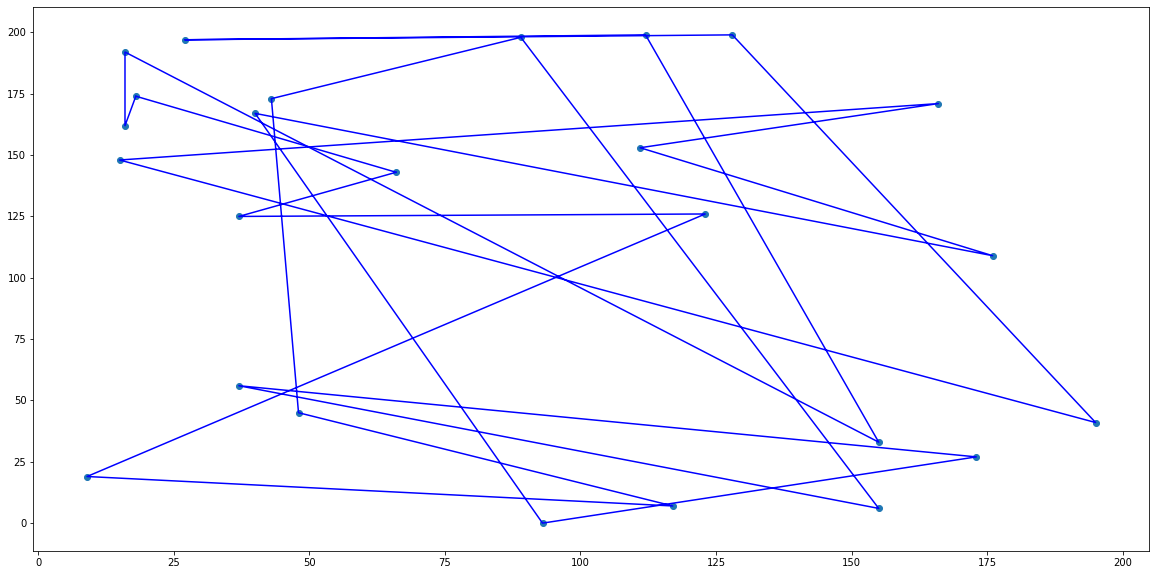

In [43]:
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
    
print(cityList)
plotPopulation(cityList) #Plot 

εκτέλεση ΓΑ.

Αρχική απόσταση: 2459.848079686477
Τελική απόσταση: 870.5198627303417


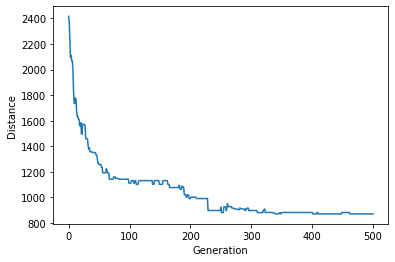

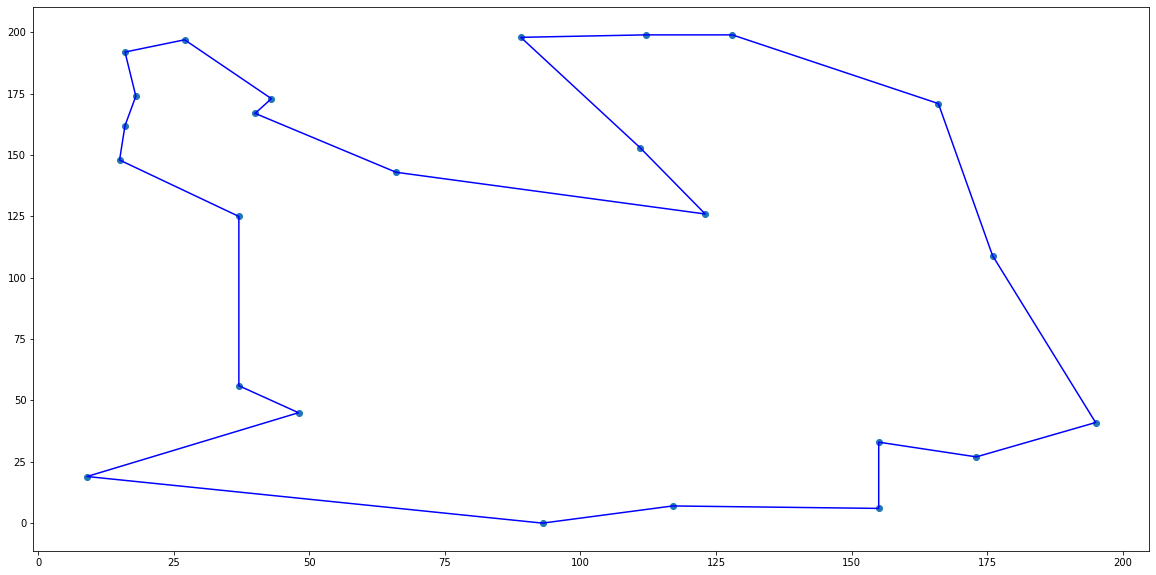

In [44]:
bestRoute = geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500) #Plot1
plotPopulation(bestRoute) #Plot2